In [1]:
from __future__ import annotations
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm
import gymnasium as gym

env = gym.make("Acrobot-v1")

In [2]:
class RandomAcrobotAgent:
    def __init__(self, env: gym.Env):
        self.env = env
        self.action_space = env.action_space

    def get_action(self):
        return self.action_space.sample()

In [3]:
n_episodes = 1000
agent = RandomAcrobotAgent(env)
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action()
        next_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        obs = next_obs

100%|██████████| 1000/1000 [00:22<00:00, 45.45it/s]


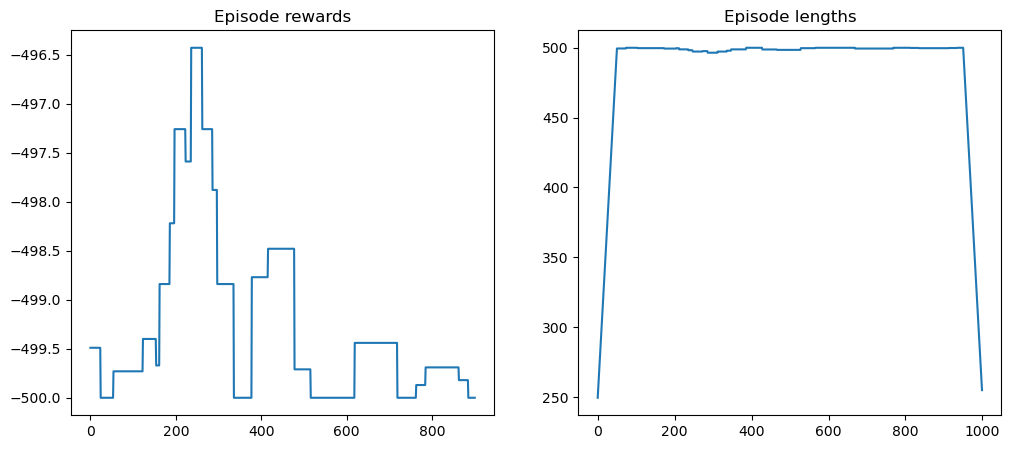

In [10]:
rolling_length = 100
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)